# Function projection in a MW basis

There are two equivalent representations of a function using multiwavets: the *compressed* representation and the *reconstructed* representation. The fisrt one employs the scaling functions at the coarsest scale $N_0$ (defined by the domain of the problem) and the wavelet functions at all successive scales $n = N_0, \ldots N_{max}$. The second one employs the scaling functions at scale $N_{max}+1$

Compressed representation:

$$f(x) \simeq \sum_i s^{N_0}_i \phi^0_i(x) + \sum_{n=N_{min}}^{N_{max}} \sum_l \sum_i d^n_{il} \psi^n_{il}(x)$$

Reconstructed representation:

$$f(x) \simeq \sum_l \sum_i s^{N_{max}+1}_{il} \phi^n_{il}(x)$$

The scaling and wavelet coefficients are formally obtained by projection:

$$s^n_{il} = \left\langle f(x)|\phi^n_{il}(x) \right\rangle$$
$$d^n_{il} = \left\langle f(x)|\psi^n_{il}(x) \right\rangle$$

Some practical considerations:
- The scaling coefficients $s$ are obtained by a simple quadrature scheme, often using the natural quadrature points and weights of the chosen polynomial basis
- The wavelet coefficients $d$ are obtained by (1) computing the scaling coeffients at the next scale and then performin the 
- The compressed representation shows how the scaling coefficients are used only at the coarsest scale whereas the wavelet coefficients are used at all subsequent scales
- The sum over the translation indices $l$ includes all nodes present at the given scale. In an *adaptive* representation the tree structure is terminated based on precision requirements
- The reconstructed representation (here shown for a *uniform* grid) is performed at scale $N_{max}+1$. 
- It is easy to see that the compressed and reconstructed representations have the same number of coefficients.



In [17]:
from vampyr import vampyr1d as vp1
import matplotlib.pyplot as plt
import numpy as np
mra1 = vp1.MultiResolutionAnalysis(box=[-32,32], order=7)
P_eps = vp1.ScalingProjector(mra1, prec = 1e-5)
P_fix = vp1.ScalingProjector(mra1, scale = 1)

def f(x):
    return np.exp(-x[0]**2) * np.sin(x[0])

f_fix = P_fix(f)
f_eps = P_fix(f).crop(1e-5)

In [18]:
print(f_eps)
print(f_fix)


*FunctionTree: nn
  genNodes: 0
  square norm: 0.24657
  root scale: -5
  order: 7
  nodes: 22
  endNodes: 12
  nodes per scale: 
    scale=-5  nodes=2
    scale=-4  nodes=4
    scale=-3  nodes=4
    scale=-2  nodes=4
    scale=-1  nodes=4
    scale=0  nodes=4


*FunctionTree: nn
  genNodes: 0
  square norm: 0.24657
  root scale: -5
  order: 7
  nodes: 254
  endNodes: 128
  nodes per scale: 
    scale=-5  nodes=2
    scale=-4  nodes=4
    scale=-3  nodes=8
    scale=-2  nodes=16
    scale=-1  nodes=32
    scale=0  nodes=64
    scale=1  nodes=128



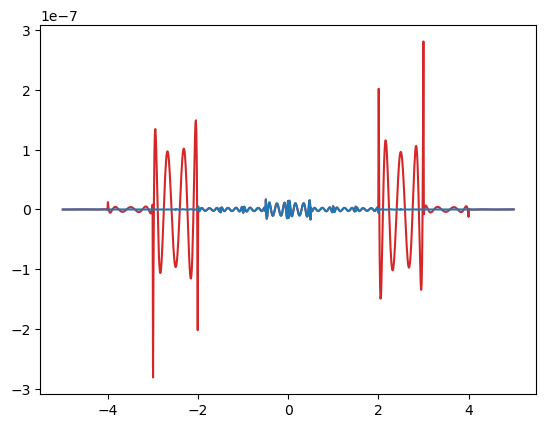

In [19]:
x_vec = np.linspace(-5, 5, 1000)
f_fix_plt = np.array([f_fix([x]) for x in x_vec ])
f_eps_plt = np.array([f_eps([x]) for x in x_vec ])
f_plt     = np.array([f([x]) for x in x_vec ])
diff_fix = f_fix_plt - f_plt
diff_eps = f_eps_plt - f_plt
plt.plot(x_vec, diff_eps, "tab:red") # your projected function
plt.plot(x_vec, diff_fix, "tab:blue") # your function
plt.show()

In [4]:
from vampyr import ScalingBasis as SB
from vampyr import ScalingFunction
from vampyr import WaveletFunction

scalingBasis = SB(10, 1)
print(scalingBasis)
print(scalingBasis.quadratureOrder())
print(scalingBasis.scalingOrder())
print(scalingBasis.scalingType())
scalingFunction = SB.scaling(i=2,l=2,s=3)

 polynomial order      : 10
 polynomial type       : Interpolating
11
10
1


TypeError: scaling(): incompatible function arguments. The following argument types are supported:
    1. (self: vampyr._vampyr.ScalingBasis, i: int, l: int = 0, n: int = 0) -> vampyr._vampyr.ScalingFunction

Invoked with: kwargs: i=2, l=2, s=3

In [ ]:
from vampyr import LegendreBasis, InterpolatingBasis
import matplotlib.pyplot as plt
import numpy as np

# Create Legendre basis of order 4 and Interpolating basis of order 3
legendre_4 = LegendreBasis(order=4)
interpol_3 = InterpolatingBasis(order=3)

#selects a given scaling function from the interpolating basis of order 3 (k=2)
index = 3
scale = 1
translation = 1
scaling_basis = interpol_3.scaling
scaling_fcn = scaling_basis(i=index, l=translation, n=scale)

#selects a given wavelet function from the legendre basis of order 4 (k=3)
index = 3
scale = 2
translation = 1
wavelet_basis = legendre_4.wavelet
wavelet_fcn = wavelet_basis(i=index, l=translation, n=scale)

x_vec = np.arange(0.0, 1.0, 0.001)
s_vec = [scaling_fcn([x]) for x in x_vec]
w_vec = [wavelet_fcn([x]) for x in x_vec]
plt.plot(x_vec, s_vec, "tab:red") # your projected function
plt.plot(x_vec, w_vec, "tab:red") # your projected function
plt.show()

In [ ]:
# Magnar
from vampyr import LegendreBasis, InterpolatingBasis
import matplotlib.pyplot as plt
import numpy as np

# Create Legendre basis of order 4 and Interpolating basis of order 3
legendre_4 = LegendreBasis(order=4)
interpol_3 = InterpolatingBasis(order=3)

# Define the roots of the Legendre polynomials of order 4
roots = [0.0694318442029618, 0.33000947820757187, 0.6699905217924281, 0.9305681557970381]
colors = ['red', 'blue', 'green', 'orange']  # Define colors to cycle through

def plot_basis(basis_set, i):
    """Plot a single basis function from a given basis set"""
    scaling = basis_set.scaling
    x = np.arange(0.0, 1.0, 0.001)
    y = [scaling(i=i)([_]) for _ in x]

    plt.figure(figsize=(10,6))  # Create a new figure with specified size
    plt.plot(x, y, color="black", label=f'$\phi_{i}^L(x)$')  # Add label for the legend
    plt.axhline(0, color='grey', linewidth=0.5)  # Add a horizontal line at zero

    for root, color in zip(roots, colors):
        plt.plot(root, 0, color=color, marker='o', linestyle='None', markersize=5)

    plt.ylim(-1.4, 3)  # Set y-axis limits
    plt.title('Basis Function Plot')  # Add a title to the plot
    plt.legend(loc="upper center", fontsize=16)  # Display the legend
    plt.show()

def plot_all_basis(basis_set, k, type="I", dots=True):
    """Plot all basis functions up to a given order from a given basis set"""
    scaling = basis_set.scaling
    x = np.arange(0.0, 1.0, 0.001)

    plt.figure(figsize=(10,6))  # Create a new figure with specified size
    for i in range(k + 1):
        y = [scaling(i=i)([_]) for _ in x]
        plt.plot(x, y, color=colors[i], label=f'$\phi_{i}^{type}(x)$')  # Add label for the legend and set the line color

    plt.axhline(0, color='grey', linewidth=0.5)  # Add a horizontal line at zero
    if dots:
        # Plot roots as dots with different colors
        for root, color in zip(roots, colors):
            plt.plot(root, 0, color=color, marker='o', linestyle='None', markersize=5)

    plt.ylim(-1.4, 3)  # Set y-axis limits
    plt.title('All Basis Functions Plot')  # Add a title to the plot
    plt.legend(loc="upper center", ncol=2, fontsize=16)  # Display the legend
    plt.show()

# Plot a single Legendre polynomial of order 4
plot_basis(legendre_4, 4)

# Plot all Legendre interpolating polynomials up to order 3
plot_all_basis(interpol_3, 3, type="I")

In [5]:
import sys, struct
import numpy as np

# Gets one of the four filter matrices
# Basis: L (legendre) or I (interpolating)
# Type: H or G
# Flag: 0 or 1
# n: from 1 to 11
def getfilter(basis = "L", type = "H", flag = 0, n = 4):
    order = n - 1
    name = "mwfilters/" + basis + "_" + type + "0_" + str(order)
    filterFile = open(name, 'rb')
    filterData = filterFile.read()
    filterList = []
    for i in range((n)*(n)):
        rstart = i * 8
        rend = (i + 1) * 8
        filterList.append(struct.unpack_from("d",filterData[rstart:rend]))
    filterArray = np.array(filterList)
    filterMatrix = np.ndarray((n, n),buffer=filterArray)
    if (flag == 1):
        if (type == "G" and n%2 != 0 ):
            sign_np = -1
        else:
            sign_np = 1
        for i in range(n):
            for j in range(n):
                sign_ij = 1
                if (((i+j)%2) == 0):
                    sign_ij = -1
                sign = sign_ij * sign_np
                filterMatrix[i,j] *= sign
    return filterMatrix

matrix = getfilter("I","G",1,1)
print(matrix)

[[-0.70710678]]
